<a href="https://colab.research.google.com/github/christianadriano/DE_TimeSeriesAnalysis/blob/master/NonStationaryProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_non_stationary_series(N=100):
    """Three time series random_walk, epsilon_1, and epsilon_2"""
    mu = 100. #mean value that the series will reverese to (mean-reversing)

    random_walk = [mu] #is a random walk
    epsilon_1 = [mu-50] #is an Ornstein–Uhlenbeck process starting at 50
    epsilon_2 = [mu+50] #is an Ornstein–Uhlenbeck process starting at 150

    sigma_RW = 0.7 #variance for the random walk series

    sigmaEta1 = 0.3 #variance for epsilon_1, (the larger the noisier)
    sigmaEta2 = 0.9 
    theta1 = 0.1 #divergence factor (smaller the faster the convergence)
    theta2 = 0.7 #divergence factor for epsilon_2
    

    for t in range(N):
        if len(random_walk) == 0:
            random_walk.append(np.random.normal(10., sigma_RW))
        else:
            random_walk.append(random_walk[-1] + np.random.normal(0., sigma_RW))

        epsilon_1.append(epsilon_1[-1] + theta1 * (mu - epsilon_1[-1]) + 
                       np.random.normal(0., sigmaEta1))

        epsilon_2.append(epsilon_2[-1] + theta2 * (mu - epsilon_2[-1]) + 
                       np.random.normal(0., sigmaEta2))

    random_walk = np.array(random_walk)

    return random_walk, epsilon_1, epsilon_2


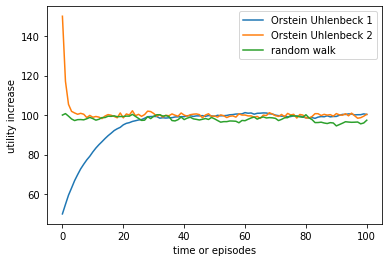

In [23]:
random_walk,epsilon_1,epsilon_2 = generate_non_stationary_series()

line_1, = plt.plot(epsilon_1, label="Orstein Uhlenbeck 1")
line_2, = plt.plot(epsilon_2,label="Orstein Uhlenbeck 2")
line_3, = plt.plot(random_walk,label="random walk")
plt.xlabel("time or episodes")
plt.ylabel("utility increase")
plt.legend(handles=[line_1,line_2,line_3])

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



In [ ]:
#apply adf test on the series
adf_test(epsilon_1)

Results of Dickey-Fuller Test:
Test Statistic                   -0.424019
p-value                           0.906011
#Lags Used                       33.000000
Number of Observations Used    9966.000000
Critical Value (1%)              -3.431006
Critical Value (5%)              -2.861830
Critical Value (10%)             -2.566924
dtype: float64


In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(epsilon_1)

Results of KPSS Test:
Test Statistic           22.525439
p-value                   0.010000
Lags Used                38.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
